# Seq2Label with conv-nets

## Goals of the lecture

1. Understand seq2label problem setting
2. Understanding how 1d-convolution and its practicalities work
3. Acquiring capability of implementing seq2label models with conv-nets on keras

## Outline

0. Intro
1. Few words about seq2label, data and its form
2. Detailed look into a simple example model
3. Look into a more complicated model
4. Look into what might be happening here

## Seq2label


### Recap on Bag-Of-Words


#### Input

As was previously discussed, when we are bulding a bag of words - classifier, our input is a set of unordered words and the output is a single label. 

The list of words is given to the model as a feature vector, a single numerical vector. So, to repeat its input is a single vector.

To do this transformation, all tokens need to have a numerical identification. That is, each word is associated with a specific number. In practice this is retrieved from a vocabulary as was shown before.

### Output

Its output is a label. As such it is a function from a vector into a label.

Labels are typically represented as a vector, which has a value for all possible labels, or a single value if the task is binary.

### How Seq2Label differs from this?

The only difference from the bow is the form of the input.

Like in the bow example, the input is a single vector, but instead of representing a set, it represents a sequence. This is achieved simply by adding the token identifiers after each other.

The output is identical.

### A Simple Example


In [37]:
#Let's define a simple and short vocabulary
tokens = list(set('it is essential the cat sat on the mat'.split()))
token_ids = {}
for i,t in enumerate(tokens):
    print (i,':',t)
    token_ids[t] = i

0 : essential
1 : it
2 : mat
3 : on
4 : the
5 : is
6 : cat
7 : sat


In [38]:
#Let's define a sentence we want to turn into a vector form

sentence = 'cat sat on the mat'.split()
print(sentence)

['cat', 'sat', 'on', 'the', 'mat']


In [40]:
#Bag of words vector
import numpy as np

#Vector is as long as the vocabulary, initial values are zeros
vector = np.zeros((len(token_ids),))
for token in sentence:
    vector[token_ids[token]] = 1.0
print (vector)

[0. 0. 1. 1. 1. 0. 1. 1.]


In [42]:
#Sequential input vector

vector = [token_ids[t] for t in sentence]
print (vector)

[6, 7, 3, 4, 2]


### Padding of the data

Some deep-learning frameworks, such as keras, require the input to have a preset shape which is the same for all examples. This is not the case with all frameworks, but its good to cover. If for nothing else, for the sake of this tutorial.

Since these input sequences are not the same length, we need to make them so. This is accomplished by padding, which in practice means adding zeros to the input vectors to make them uniform in size


In [45]:
#Padding can easily be achieved with keras in-built functions
from keras.preprocessing.sequence import pad_sequences

pad_sequences(np.array([vector]), maxlen=20, padding='post')

array([[6, 7, 3, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

### Super short recap on embedding layers

Most often these sequences of numbers are used to load embeddings, which are used as the input of the next stage of the network. An embedding layer could be imagined as a dictionary; in go indexes, out comes representative embeddings.

What happens inside an embedding layer can be demonstrated with numpy:

In [48]:
embedding_size = 4
#Let's just make a random matrix to act as our demonstration embedding matrix
embedding_matrix = np.random.rand(len(token_ids),embedding_size)

print ('from:', vector)
print ('into:')
print (embedding_matrix[vector])
print ('and the matrix has a shape:', embedding_matrix[vector].shape)



from: [6, 7, 3, 4, 2]
into:
[[0.85038981 0.40489633 0.12422465 0.92529823]
 [0.21168522 0.15332721 0.75282947 0.5283064 ]
 [0.75143017 0.27964974 0.9766692  0.4946047 ]
 [0.89808113 0.43437026 0.10011865 0.18511744]
 [0.62647722 0.12335613 0.45529044 0.30627977]]
and the matrix has a shape: (5, 4)


## Convolution recap

### What's good about convolution?

Convolutional networks are fast. They are fast because they are easily parallelizable. That is because no part of the convolution output depends on another one of the outputs. If that was the case, as it is in recurrent neural networks we couldn't make predictions before other parts of the layer have finished calculating.

### 1-dimensional convolution

During he earlier lecture and also to a large degree on the internet, image classification is used to demonstrate conv-nets. That is very understandable, for that is the area in which these networks traditionally shine and also because the convolution operation is a traditional tool for image processing.

An image is a two dimensional input. It has height and it has width. A sequence of words has only one dimension. That is, you can traverse it forwards and backwards, but there is no traversing it "up" or "down" nor is there "toward" and "from" etc. It just is a one-dimensional sequence of tokens.

Because of this, the convolution operation applied to text is usally one dimensional, instead of two dimensional convolution often applied to images.

The relevant variables in the operation are:

1. Kernel size, in effect how many conv operations are applied to the input
2. Filter size, in effect how wide the applied conv operations are
3. Stride length
4. Padding

#### Input / Output

This operation takes as its input 2-d matrices (when we discount the batch_size). The matrix is in the shape of (steps, input_dim)

The operation returns similarly a 2-d matrix. The size of the output matrix is (new_steps, filters). In this shape filters corresponds to the amount of filters. The new step count is a little bit trickier. It depends on stride length, kernel size and used padding style. 
https://keras.io/layers/convolutional/#conv1d


### Illustration

![title](Untitled.png)

## 1-dimensional convolution and text

Since the convolutional network bases its activations on a window of certain length, it is reacting to snippets of text the size of the convolution window. For example a conv-net with a window size of three, is capable of reacting to trigrams etc. In this sense convolutional text classifiers remind us of bag-of-ngram classifiers.

### Pooling

The pooling operation is used for dimensionality reduction of the input. The type of pooling discussed in this lecture is max-pooling, but other variants exist. In the context of this lecture we will be using global pooling, similarly variants exist.

Global, 1 dimensional, max pooling operation takes as its input a 2-d matrix and returns a vector. 

This operation is best explained with an illustration.

### Illustration


In [54]:
#We can illustrate global max pooling with numpy
embeddings = embedding_matrix[vector]
print ('we start with:')
print (embeddings)
print ()
print ('after max pooling:')
print (np.max(embeddings, axis=0))

we start with:
[[0.85038981 0.40489633 0.12422465 0.92529823]
 [0.21168522 0.15332721 0.75282947 0.5283064 ]
 [0.75143017 0.27964974 0.9766692  0.4946047 ]
 [0.89808113 0.43437026 0.10011865 0.18511744]
 [0.62647722 0.12335613 0.45529044 0.30627977]]

after max pooling:
[0.89808113 0.43437026 0.9766692  0.92529823]


### ReLU

Rectified linear unit. An activation used often with conv-nets. As an activation it doesn't care about input size. Input and output are always of similar shape. Simply returns the value if it is >0 and 0 otherwise.



## The simple model

To start of this lecture, let us look into an example convnet-text classifier included in keras examples: https://github.com/keras-team/keras/blob/master/examples/imdb_cnn.py

It uses the IMDB-dataset already we are already familiar with and contains a single convolution layer. It's performance is said to be 0.89, which is somewhat disappointingly less than the bag-of-words example earlier.

In addition to demonstrating a convolutional text classifier, the example nicely illuminates what typical deep-learning code looks like.

For purposes of simplification I've yet very slightly simplified the code.


In [1]:
'''This example demonstrates the use of Convolution1D for text classification.
Gets to 0.89 test accuracy after 2 epochs.
90s/epoch on Intel i5 2.4Ghz CPU.
10s/epoch on Tesla K40 GPU.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 300
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))



Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 83s 3ms/step - loss: 0.4066 - acc: 0.8100 - val_loss: 0.2944 - val_acc: 0.8770
Epoch 2/2
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2289 - acc: 0.9094 - val_loss: 0.2716 - val_acc: 0.8874


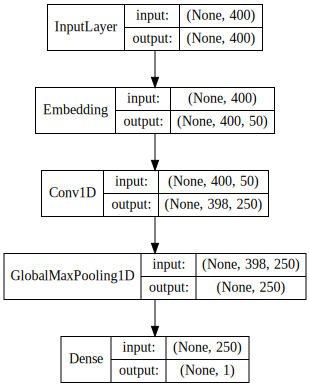

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False).create(prog='dot', format='svg'))
#model_to_dot(model,show_shapes=True,show_layer_names=False)

## What if we were to load pre-trained embeddings?

In [5]:
vocab = imdb.get_word_index()

In [6]:
vocab

{'sigfried': 54043,
 'hinge': 72849,
 'baddiel': 44068,
 'zemen': 83986,
 'joycelyn': 26813,
 "evening's": 20485,
 'transistions': 60115,
 'emitting': 35264,
 'sheritt': 78155,
 'pitchforks': 50581,
 'hayseeds': 68154,
 'dains': 84537,
 'veneration': 67401,
 'train': 1371,
 "'andres": 59091,
 "call'": 87980,
 'mins': 7397,
 'displease': 68626,
 'snuck': 16289,
 'emphasize': 8551,
 'speach': 77750,
 'indiscernible': 31036,
 'predicted': 8614,
 'lowlights': 51982,
 'roget': 63571,
 'reloading': 30084,
 'maximals': 85192,
 'orin': 83069,
 'nardini': 80432,
 'snatchers': 16814,
 'excluding': 16172,
 'widening': 30443,
 'definately': 11675,
 "'edison'": 48514,
 'beckoned': 57148,
 'duce': 38480,
 'campmates': 75850,
 'medioacre': 70573,
 'shya': 75867,
 'f430': 61443,
 'portable': 21028,
 'milwaukee': 24583,
 'poll': 31523,
 'thembrians': 44575,
 'leste': 82651,
 'replacement': 7650,
 'oblige': 46688,
 'theresa': 12453,
 'carousing': 45884,
 'vandermey': 68049,
 'cellist': 62180,
 'colm': 1

In [7]:
##Let's load our embeddings

from gensim.models import KeyedVectors
vector_model=KeyedVectors.load_word2vec_format("./wiki-news-300d-1M.vec", binary=False, limit=1000000)

In [8]:
#...and let's normalize
vector_model.init_sims(replace=True)

In [26]:
#let's create an embedding matrix

import numpy as np

embedding_matrix = np.zeros((max_features, 300))
countr = 0
for token, idx in vocab.items():
    
    if idx < max_features:
        if token in vector_model:
            embedding_matrix[idx] = vector_model[token]
            countr += 1
print (countr)

4894


In [28]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 300
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions

embedding_layer = Embedding(max_features,
                    embedding_dims,
                    weights = [embedding_matrix],
                    input_length=maxlen)

model.add(embedding_layer)

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 308s 12ms/step - loss: 0.3604 - acc: 0.8390 - val_loss: 0.3265 - val_acc: 0.8615
Epoch 2/5
25000/25000 [==============================] - 306s 12ms/step - loss: 0.1783 - acc: 0.9331 - val_loss: 0.2582 - val_acc: 0.8946
Epoch 3/5
25000/25000 [==============================] - 307s 12ms/step - loss: 0.0828 - acc: 0.9742 - val_loss: 0.2786 - val_acc: 0.8970
Epoch 4/5
25000/25000 [==============================] - 307s 12ms/step - loss: 0.0250 - acc: 0.9962 - val_loss: 0.3202 - val_acc: 0.8948
Epoch 5/5
25000/25000 [==============================] - 311s 12ms/step - loss: 0.0066 - acc: 0.9998 - val_loss: 0.3499 - val_acc: 0.8988


## Yay! It got a little better!

## A classifier with multiple convolutional layers

Inspired by an illustration in the previous lecture, only a little simplified.

In [32]:
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

from keras.layers import Input, Dense, Concatenate
from keras.models import Model


# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 300
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')


#Let's define the inputs
x = Input(shape=(maxlen,))

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions

embedding_layer = Embedding(max_features,
                    embedding_dims,
                    weights = [embedding_matrix],
                    input_length=maxlen)

embeddings = embedding_layer(x)

conv_res = []
for width in range(2,5):

    conv_result = Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1)(embeddings)
    pooled = (GlobalMaxPooling1D())(conv_result) 
    conv_res.append(pooled)
    

concatenated = (Concatenate())(conv_res)
    
# We add a vanilla hidden layer:
out = Dense(1, activation='sigmoid')(concatenated)

model = Model(x, out)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 830s 33ms/step - loss: 0.3459 - acc: 0.8417 - val_loss: 0.2850 - val_acc: 0.8804
Epoch 2/5
25000/25000 [==============================] - 831s 33ms/step - loss: 0.1726 - acc: 0.9343 - val_loss: 0.2789 - val_acc: 0.8873
Epoch 3/5
25000/25000 [==============================] - 838s 34ms/step - loss: 0.0692 - acc: 0.9797 - val_loss: 0.2779 - val_acc: 0.8982
Epoch 4/5
25000/25000 [==============================] - 834s 33ms/step - loss: 0.0186 - acc: 0.9970 - val_loss: 0.3226 - val_acc: 0.9002
Epoch 5/5
25000/25000 [==============================] - 844s 34ms/step - loss: 0.0050 - acc: 0.9997 - val_loss: 0.3693 - val_acc: 0.8991


### Yay! Just a little better again!

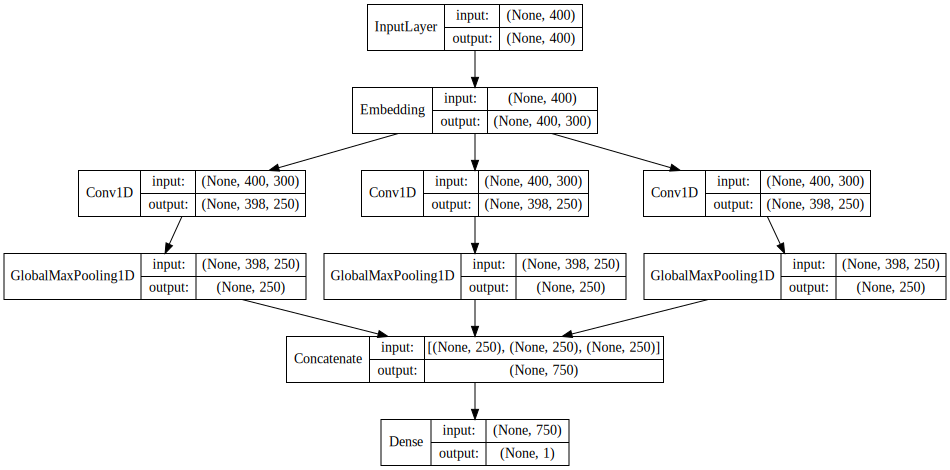

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False).create(prog='dot', format='svg'))

## Good reading:

https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8
